<font color='green'> 
**Youtube - Aladdin Persson Kanalı - TensorFlow 2.0 Beginner Tutorials serisi**
    
TensorFlow Tutorial 3 - Neural Networks with Sequential and Functional API - Aladdin Persson anlattı.
</font>

**Video:** [TensorFlow Tutorial 3 - Neural Networks with Sequential and Functional API](https://www.youtube.com/watch?v=pAhPiF3yiXI&list=PLhhyoLH6IjfxVOdVC1P1L5z5azs0XjMsb&index=3)

### İçindekiler

**MNIST Dataset**

**Loading Dataset**

**Preprocessing Dataset**

**Creating a Basic Neural Network**
* Sequential API
* Functional API
* Extract Spesific Layer Outputs
* Extract All Layer's Features

**Suggestions**

### <font color="blue"> Giriş </font>

We're gonna create a basic neural network.

Neural networklerin teorik kısmını anlayabilmek için tavsiye edilen kaynaklar:

* [3Blue1Brown - Neural networks](https://www.youtube.com/watch?v=aircAruvnKk&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi&index=1)


* [DeepLearningAI - Neural Networks and Deep Learning (Course 1 of the Deep Learning Specialization)](https://www.youtube.com/playlist?list=PLkDaE6sCZn6Ec-XTbcX1uRg2_u4xOEky0)


* [DeepLearningAI - Improving Deep Neural Networks: Hyperparameter Tuning, Regularization and Optimization (Course 2 of the Deep Learning Specialization)](https://www.youtube.com/playlist?list=PLkDaE6sCZn6Hn0vK8co82zjQtt3T2Nkqc)

In [1]:
import tensorflow as tf
from tensorflow import keras 

Since tensorflow 2.0 keras is integrated with tensorflow and is the official higher level api and is essentially the go-to when we are building neural networks and models in tensorflow. When building neural networks you will use keras and then depending on sort of the flexibility that you need when creating your model you're going to use different apis of keras. In this video we're going to take a look at the **sequential api of keras** and the **functional api**.

### MNIST Dataset

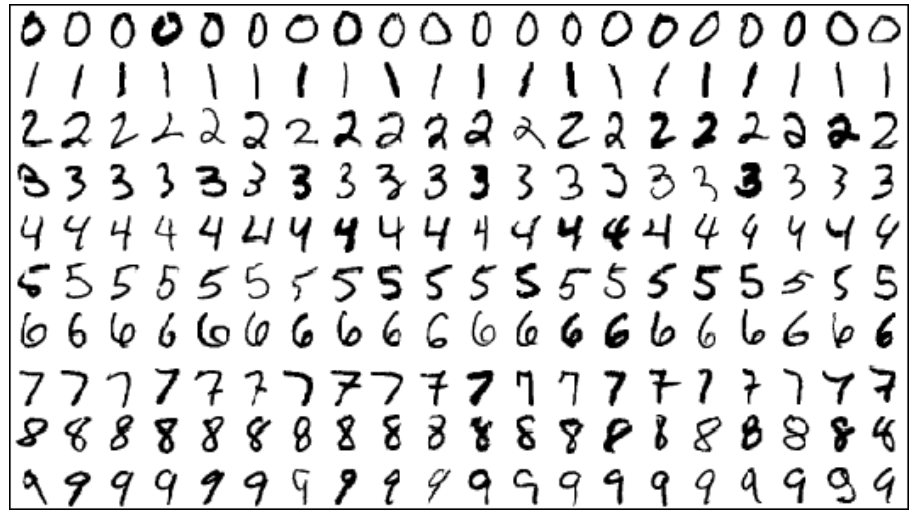

60.000 train images, 10.000 test images içeriyor. Images are gray-scale. We have only one channel. Pixels are 28x28 so they are relatively small.

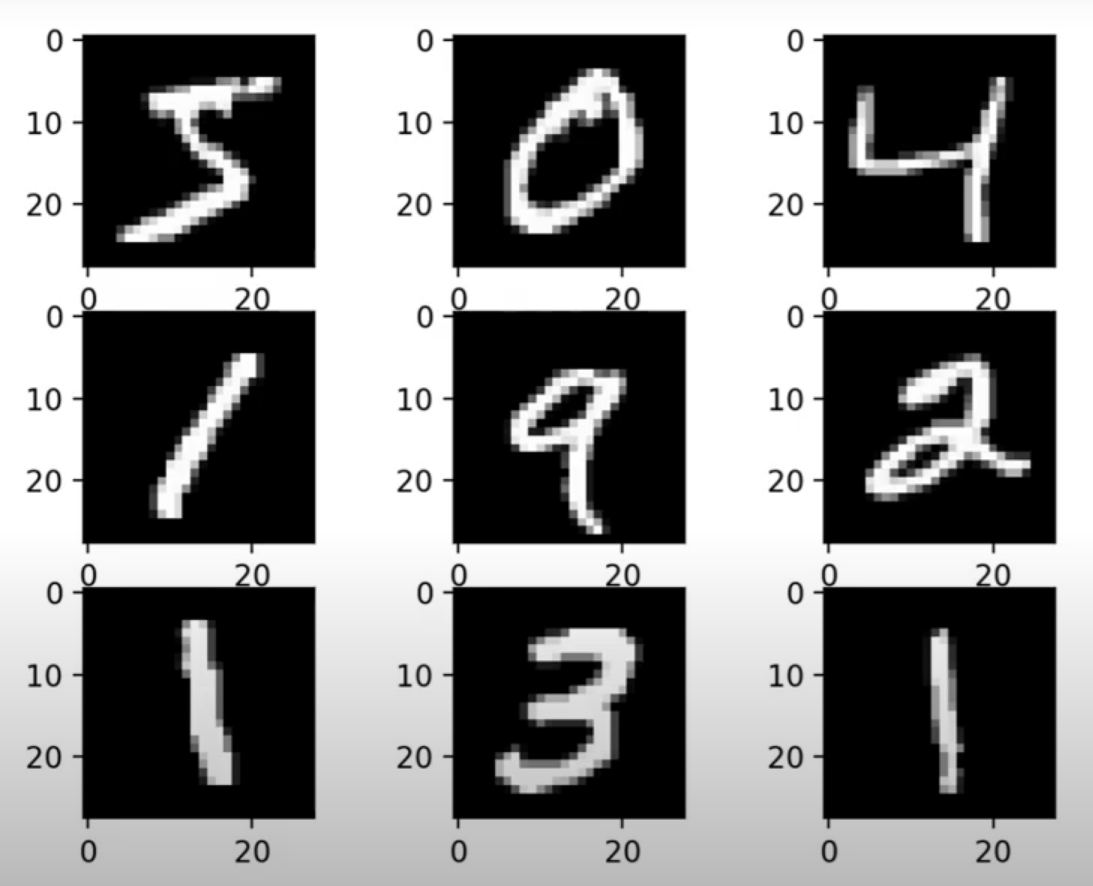

### 1. Loading Dataset

In [2]:
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist 

In [3]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [4]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [5]:
y_train[7]

3

### 2. Preprocessing Dataset

1. 60.000 resmimiz var 28x28 boyutunda. Bu resimlerin featurelarını tek bir column olarak temsil etmemiz gerekiyor neural networke gönderebilmek için. Bu yüzden `x_train.reshape(-1,28*28)` koduyla **flatten** yapacağız.


2. `x_train.reshape(-1,28*28).astype("float32")` koduyla **computationı minimize etmek** için type'ı float64'ten float32'ye dönüştürüyoruz.


3. Piksel değerleri 0-255 arasında. Daha hızlı training etmek için `x_train = x_train.reshape(-1, 28*28).astype("float32") / 255.0` koduyla 0-1 arasına **normalize** ediyoruz. 


4. Aynı işlemi `x_test = x_test.reshape(-1, 28*28).astype("float32") / 255.0` koduyla **test seti için de** yapıyoruz. 

In [6]:
x_train = x_train.reshape(-1, 28*28).astype("float32") / 255.0 

In [7]:
x_test = x_test.reshape(-1, 28*28).astype("float32") / 255.0

In [8]:
x_train.shape  

(60000, 784)

In [9]:
x_test.shape

(10000, 784)

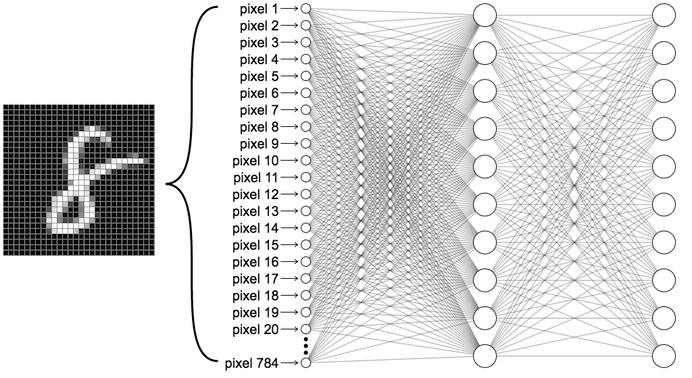

Elimizdeki x_train ve y_train birer numpy array, bunu `x_train = tf.convert_to_tensor(x_train)` koduyla tensore çevirebiliriz normalde ama tensorflow bunu otomatik olarak yapıyor zaten.

### 3. Creating a Basic Neural Network

#### <font color="blue"> 3.1. Sequential API </font>

Sequential API of keras is very convenient but not very flexible. 1 inputu sadece 1 outputa maplemeni sağlıyor. If you have one input to one output then sequential is exactly what you want to use.

##### <font color="green"> `model = keras.Sequential()` içerisinde liste halinde layerları yazıyoruz. </font>

In [10]:
model = keras.Sequential(
[
    layers.Dense(512, activation ='relu'), # Dense: fully connected layer
    layers.Dense(256, activation ='relu'),
    layers.Dense(10), # output layer
]
) 

Normalde output layerde softmax functionı kullanacağız ama bunu loss fonksiyonunda tanımlıyoruz.

###### 3.1.1.

**<font color="purple">`model = keras.Sequential()` içerisinde inputun shape'ini belirtirsek `keras.Input(shape=28*28))` şeklinde, `print(model.summary())` koduyla modelimizi çalıştırmadan özetini alabiliriz.</font>**

In [11]:
model = keras.Sequential(
[
    keras.Input(shape=(28*28)),
    layers.Dense(512, activation ='relu'), # Dense: fully connected layer
    layers.Dense(256, activation ='relu'),
    layers.Dense(10), # output layer
]
) 

In [12]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________
None


###### 3.1.2.

<font color="purple">`model = keras.Sequential()` içinde liste halinde layerları yazmak yerine başta parantezin içini boş bırakacak şekilde `model = keras.Sequential()` yazıp arkasından `model.add()` ile ayrı ayrı da ekleyebiliriz. Birer birer layer ekledikten sonra her seferinde özetini de alabiliriz modelimizin. Debug etmek için bu yöntemi kullanabiliriz layerlarda input ne kadar değişmiş gözlemlemek için.</font>

In [13]:
model = keras.Sequential()

model.add(keras.Input(shape=(784)))
model.add(layers.Dense(512, activation='relu'))
print(model.summary())
model.add(layers.Dense(256, activation='relu'))
print(model.summary())
model.add(layers.Dense(10))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               401920    
Total params: 401,920
Trainable params: 401,920
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
Total params: 533,248
Trainable params: 533,248
Non-trainable params: 0
_________________________________________________________________
None


##### ---

In [14]:
model = keras.Sequential(
[
    layers.Dense(512, activation ='relu'), # Dense: fully connected layer
    layers.Dense(256, activation ='relu'),
    layers.Dense(10), # output layer
]
) 

##### <font color="green"> `model.compile()` içerisinde ağımızın eğitim bölümünü nasıl yapılandıracağımızı anlatıyoruz kerasa. </font>

In [15]:
model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = keras.optimizers.Adam(lr=0.001),
    metrics = ["accuracy"],
) 

* `loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)` koduyla loss fonksiyonumuzu özelleştiriyoruz. `(from_logits = True)` yapmamızın amacı ağı önce softmaxe göndermek daha sonra SparseCategoricalCrossentropy fonksionuyla maplemek. "Sparse" CategoricalCrossentropy means that y_train labels just an integer for that specify for the correct label. For example if it's a digit of three then y_train of that specific example will just be three. (If you remove the Sparse so you would use CategoricalCrossentropy then you would need to have one-hot encodings.)


* `optimizer = keras.optimizers.Adam(lr=0.001)` ile optimizerı belirtiyoruz. 


* `metrics = ["accuracy"]` ile metricsi belirtiyoruz. Metricsten kasıt [bunlar](https://keras.io/api/metrics/). 

##### <font color="green"> `model.fit()` ile yapılandırdığımız modeli somut olarak eğitiyoruz. </font>

In [16]:
model.fit(x_train, y_train, batch_size=32, epochs=5, verbose=2) # verbose=2 her epochtan sonra yazdıracak.

Epoch 1/5
1875/1875 - 8s - loss: 0.1851 - accuracy: 0.9438
Epoch 2/5
1875/1875 - 8s - loss: 0.0819 - accuracy: 0.9742
Epoch 3/5
1875/1875 - 7s - loss: 0.0545 - accuracy: 0.9827
Epoch 4/5
1875/1875 - 7s - loss: 0.0425 - accuracy: 0.9855
Epoch 5/5
1875/1875 - 8s - loss: 0.0324 - accuracy: 0.9894


###### verbose = 2

By setting verbose 0, 1 or 2 you just say how do you want to 'see' the training progress for each epoch.

`verbose=0` will show you nothing (silent)

`verbose=1` will show you an animated progress bar like this:



`verbose=2` will just mention the number of epoch like this:



In [17]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (32, 512)                 401920    
_________________________________________________________________
dense_10 (Dense)             (32, 256)                 131328    
_________________________________________________________________
dense_11 (Dense)             (32, 10)                  2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________
None


##### <font color="green"> `model.evaluate()` ile test setimizi gönderip modelimizin başarısını değerlendiriyoruz. </font>

In [18]:
model.evaluate(x_test, y_test, batch_size=32, verbose=2) # epoch belirtmedik, tek bir epochta eğiteceğiz.

313/313 - 0s - loss: 0.0784 - accuracy: 0.9780


[0.07838351279497147, 0.9779999852180481]

#### <font color="blue"> 3.2. Functional API </font>

Functional API is a bit more flexible. I can handle multiple inputs and multiple outputs.

##### <font color="green">Bu sefer layerları sequential şekilde değil de birbirlerini fonksiyon içine alacak şekilde ayrı ayrı tanımlıyoruz. </font>

In [19]:
inputs = keras.Input(shape=(784))
x = layers.Dense(512, activation='relu')(inputs)
x = layers.Dense(256, activation='relu')(x)
outputs = layers.Dense(10, activation='softmax')(x)
model = keras.Model(inputs=inputs, outputs=outputs) # ek olarak bunu yazıyoruz

Layerlara özel isim verebiliriz. Özetini aldığımızda modelin daha okunur olur.

In [20]:
inputs = keras.Input(shape=(784))
x = layers.Dense(512, activation='relu', name='first_layer')(inputs)
x = layers.Dense(256, activation='relu', name='second_layer')(x)
outputs = layers.Dense(10, activation='softmax')(x)
model = keras.Model(inputs=inputs, outputs=outputs) 

In [21]:
print(model.summary())

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
first_layer (Dense)          (None, 512)               401920    
_________________________________________________________________
second_layer (Dense)         (None, 256)               131328    
_________________________________________________________________
dense_15 (Dense)             (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________
None


##### <font color="green"> `model.compile()` </font> 

Layer içerisinde zaten softmaxi tanımladığımız için `from_logits=False` olarak işaretledik.

In [22]:
model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=False), # hiçbir şey yazmazsak da default olarak False zaten.
    optimizer = keras.optimizers.Adam(lr=0.001),
    metrics = ["accuracy"],
) 

##### <font color="green"> `model.fit()` </font>

In [23]:
model.fit(x_train, y_train, batch_size=32, epochs=5, verbose=2) # verbose=2 her epochtan sonra yazdıracak.

Epoch 1/5
1875/1875 - 8s - loss: 0.1861 - accuracy: 0.9431
Epoch 2/5
1875/1875 - 7s - loss: 0.0794 - accuracy: 0.9746
Epoch 3/5
1875/1875 - 8s - loss: 0.0564 - accuracy: 0.9818
Epoch 4/5
1875/1875 - 8s - loss: 0.0406 - accuracy: 0.9868
Epoch 5/5
1875/1875 - 8s - loss: 0.0325 - accuracy: 0.9897


##### <font color="green"> `model.evaluate()` </font>

In [24]:
model.evaluate(x_test, y_test, batch_size=32, verbose=2) # epoch belirtmedik, tek bir epochta eğiteceğiz.

313/313 - 0s - loss: 0.0678 - accuracy: 0.9815


[0.06784687936306, 0.9815000295639038]

#### <font color="blue">3.3. Extract Spesific Layer Outputs</font>

How to extract specific layer outputs? That might be useful when debugging. 

Sequential ve Functional API'ın her ikisi için de geçerli. Sequential için deneyecek olursak:

##### <font color="green"> Outputunu almak istediğimiz layerı `model.layers[-2]` gibi bir kodla kaçıncı layer olduğunu belirtebiliriz. </font>

In [27]:
# Bunu daha önce tanımlamıştık.

model = keras.Sequential(
[
    keras.Input(shape=(28*28)),
    layers.Dense(512, activation ='relu'), 
    layers.Dense(256, activation ='relu'),
    layers.Dense(10), 
]
) 

In [28]:
model = keras.Model(inputs=model.inputs,
                   outputs=[model.layers[-2].output]) 

`model.layers[-1]` son eklediğimiz layerı ifade ediyor `layers.Dense(10)`i yani. `model.layers[-2]`ise `layers.Dense(256, activation ='relu')` bunu alıyor. 

In [29]:
feature = model.predict(x_train)

In [30]:
feature.shape

(60000, 256)

##### <font color="green"> Çıktısını almak istediğimiz layerı özel isim verip ismiyle de çağırabiliriz `model.get_layer('my_layer')` şeklinde. </font>

In [31]:
model = keras.Sequential(
[
    keras.Input(shape=(28*28)),
    layers.Dense(512, activation ='relu'), 
    layers.Dense(256, activation ='relu', name='my_layer'),
    layers.Dense(10), 
]
) 

In [32]:
model = keras.Model(inputs=model.inputs,
                   outputs=[model.get_layer('my_layer').output]) 

In [33]:
feature = model.predict(x_train)

In [34]:
feature.shape

(60000, 256)

#### <font color="blue">3.4. Extract All Layer's Features</font>

In [44]:
model = keras.Sequential(
[
    keras.Input(shape=(28*28)),
    layers.Dense(512, activation ='relu'), 
    layers.Dense(256, activation ='relu', name='my_layer'),
    layers.Dense(10), 
]
) 

In [45]:
model = keras.Model(inputs=model.inputs, outputs=[layer.output for layer in model.layers])
features = model.predict(x_train)

In [46]:
for feature in features:
    print(feature.shape)

(60000, 512)
(60000, 256)
(60000, 10)


### 4. Suggestions

1. Try and see what accuracy you can get by increasing the model size, training for longer, etc. You should be able to get over 98.1% on the test set!


2. Try using different optimizers than Adam, for example Gradient Descent with Momentum, Adagrad, and RMSprop which one gives you the best results.


3. Is there any difference if you remove the normalization of the data?